In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import EDS_PhaSe_functions as EDS_PhaSe
import gb_mask_functions as GB_MASK

import os

SEP = os.sep

In [2]:
# INPUTS REQUIRED
sample = "" # sample name; directory of same name must be in 'sample-data'
max_px = 20 # Maximum no. of pixels that will be analyzed around a gb location


In [ ]:
dict_EDS_PhaSe, _ = EDS_PhaSe.load_EDS_PhaSe_cache(sample)
dict_px_length = dict_EDS_PhaSe["info"]["px_length"]
ms_raw = dict_EDS_PhaSe["ms"]["se"]

In [3]:
GB_MASK.create_fills_and_masks_around_gb(sample, max_px=max_px)

Loading input grain boundary mask... DONE.
Creating fill areas around grain boundary... DONE.
Creating masks at specific distances around grain boundary... DONE.


In [4]:
dict_gb_fills, dict_gb_masks = GB_MASK.load_gb_fills_and_masks(sample)

In [5]:
el_comp_from_gb_at_percent = GB_MASK.get_comp_on_gb_masks(sample, dict_gb_masks, dict_px_length, comp_type="at_percent", save=True)
el_comp_from_gb_wt_percent = GB_MASK.get_comp_on_gb_masks(sample, dict_gb_masks, dict_px_length, comp_type="wt_percent", save=True)


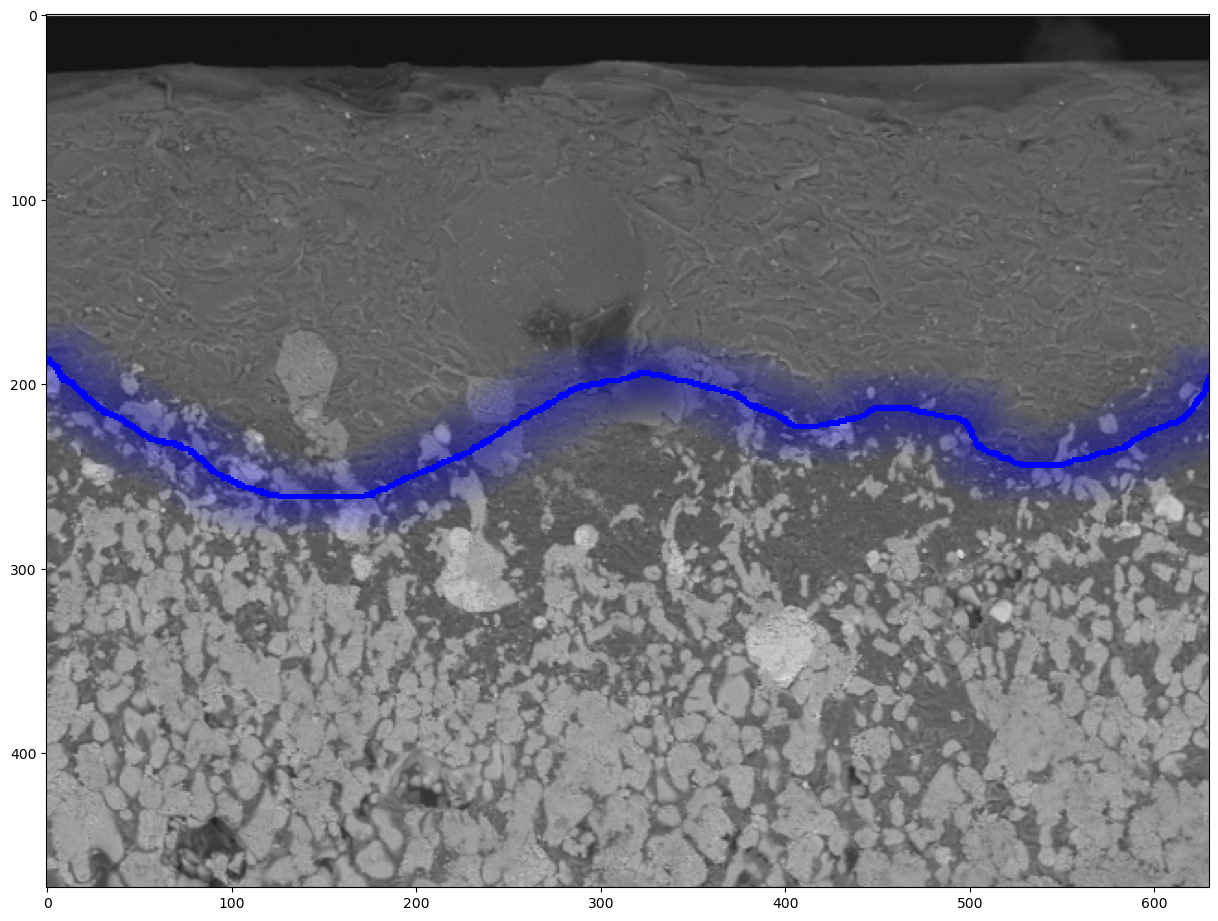

In [10]:
px_max_to_plot = 19

plt.figure(figsize=(15,15))
plt.imshow(ms_raw)

px_value = np.arange(px_max_to_plot+1, -1, -1)
for px in px_value:
    px_fill_data = dict_gb_fills["%s-px"%(px)]
    px_fill_data[np.where(px_fill_data==0)] = np.nan
    if px == 0:
        alpha_val = 1
    else:
        alpha_val = 0.02
    plt.imshow(px_fill_data, cmap="bwr", alpha=alpha_val, interpolation="none")